# Week6 Time Series 정규세션 과제

### 주가 데이터를 활용하여 자유롭게 시계열분석을 진행해주세요.
### Box-Jenkins 방법론
- 식별
- 추정
- 진단
- 예측

## 라이브러리 불러오기

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

## 주가 데이터 불러오기
- 예) 삼성 005930.KS

In [4]:
samsung_df = yf.download('005930.KS',
                      start='2020-01-01',
                      end='2021-04-21',
                      progress=False)

samsung_df = samsung_df[["Close"]]

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['day', 'price']

samsung_df['day'] = pd.to_datetime(samsung_df['day'])

samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)

samsung_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0


In [6]:
samsung_df.isna().sum()

price    0
dtype: int64

<Axes: xlabel='day'>

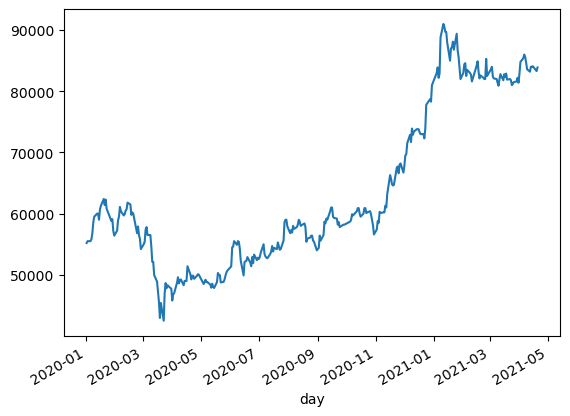

In [7]:
# Line plots of time series
samsung_df['price'].plot()

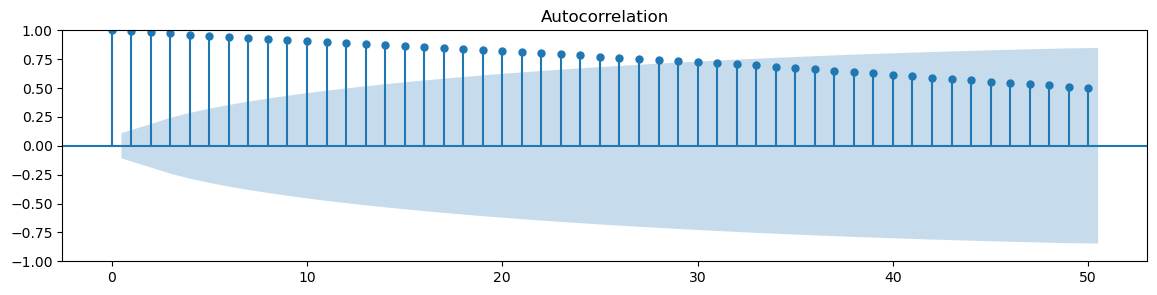

In [21]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(14,3), sharex=False, sharey=False)
ax1 = plot_acf(samsung_df, lags=50, ax=ax1)

In [22]:
adfuller(samsung_df)

(-0.21218947966329232,
 0.9370529809409828,
 0,
 321,
 {'1%': -3.450886958636161,
  '5%': -2.870586350823483,
  '10%': -2.5715897843576827},
 5192.408736501805)

In [23]:
# 차분
model = sm.tsa.arima.ARIMA(samsung_df, order = (2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  322
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2736.984
Date:                Tue, 27 Feb 2024   AIC                           5483.969
Time:                        13:21:33   BIC                           5502.826
Sample:                             0   HQIC                          5491.498
                                - 322                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0662      1.937      0.034      0.973      -3.731       3.863
ar.L2          0.7292      1.732      0.421      0.674      -2.665       4.123
ma.L1         -0.0527      1.959     -0.027      0.9

/Users/yongjin/miniforge3/envs/tobigs/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yongjin/miniforge3/envs/tobigs/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yongjin/miniforge3/envs/tobigs/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yongjin/miniforge3/envs/tobigs/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive paramet

In [24]:
# 예측
pred1 = model_fit.predict()
pred1

day
2020-01-02        0.000000
2020-01-03    55685.662435
2020-01-06    56146.349972
2020-01-07    55884.303321
2020-01-08    56283.765636
                  ...     
2021-04-14    84004.170515
2021-04-15    84008.761969
2021-04-16    84104.770906
2021-04-19    83905.561233
2021-04-20    83292.129942
Name: predicted_mean, Length: 322, dtype: float64

In [26]:
pred1_df = pd.DataFrame(pred1)
pred1_df

,predicted_mean
day,
2020-01-02,0.000000
2020-01-03,55685.662435
2020-01-06,56146.349972
2020-01-07,55884.303321
2020-01-08,56283.765636
...,...
2021-04-14,84004.170515
2021-04-15,84008.761969
2021-04-16,84104.770906


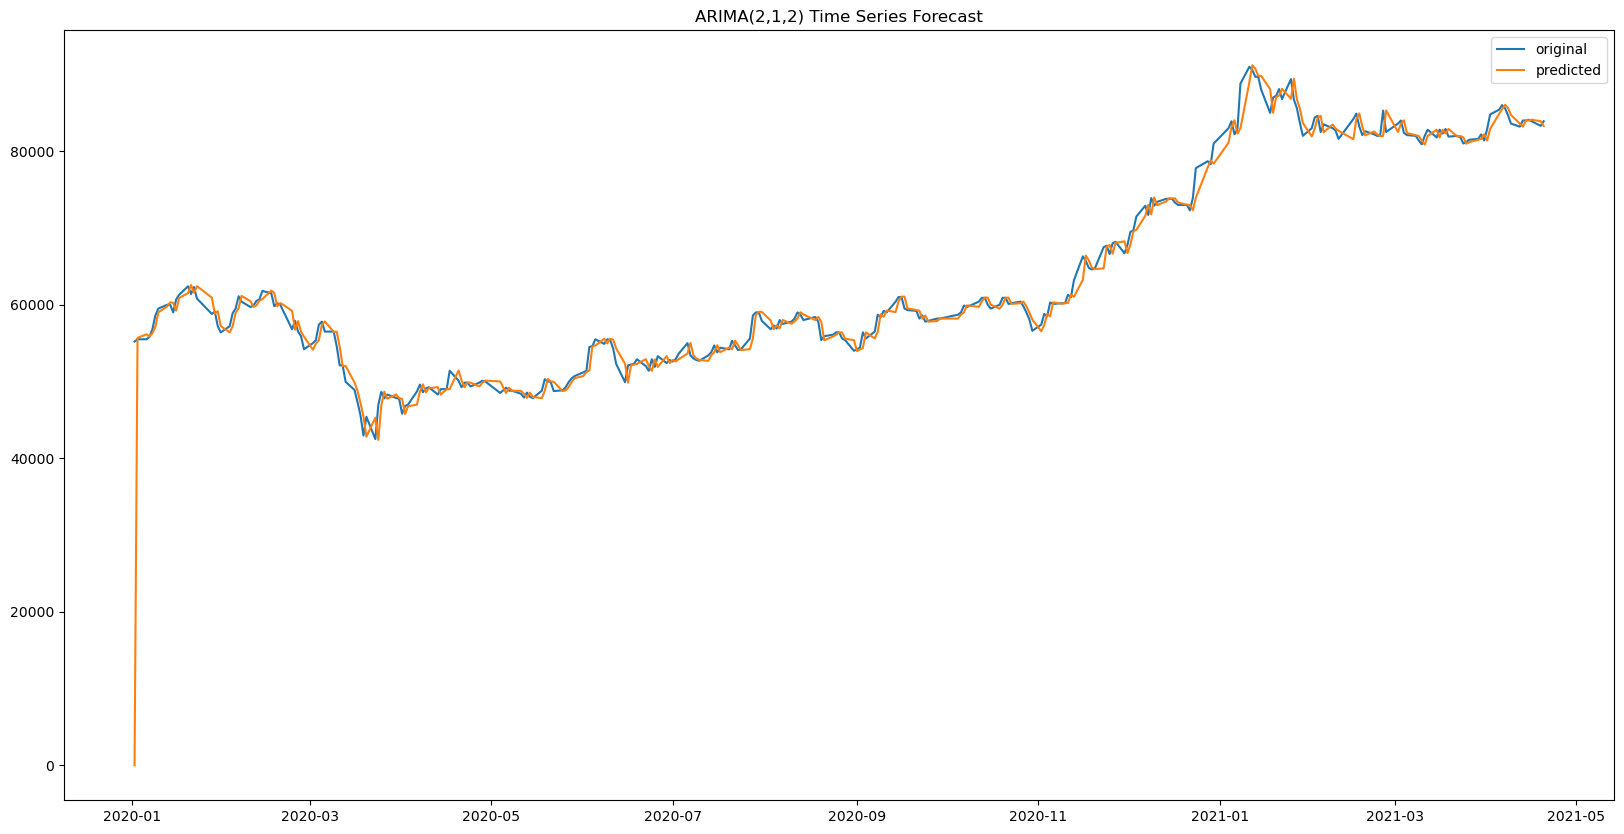

In [28]:
plt.figure(figsize=(20,10))
plt.plot(samsung_df.index, samsung_df.price, label='original')
plt.plot(pred1_df.index, pred1_df.predicted_mean, label='predicted')
plt.title('ARIMA(2,1,2) Time Series Forecast')
plt.legend()
plt.show()